In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "C:\\CSE\\Chirag-Rao-KV\\Task 3.2\\Threats (1).csv"
df = pd.read_csv(path)
df

,Unnamed: 0,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,40000,40001,0.012996,tcp,-,FIN,16,18,1540,1644,...,1,6,0,0,0,5,7,0,Normal,0
1,40001,40002,0.004119,tcp,-,FIN,12,12,1064,2260,...,1,1,0,0,0,3,8,0,Normal,0
2,40002,40003,0.000988,udp,dns,CON,2,2,146,178,...,1,2,0,0,0,7,2,0,Normal,0
3,40003,40004,3.415787,tcp,ssh,FIN,230,238,24344,29556,...,1,1,0,0,0,4,1,0,Normal,0
4,40004,40005,0.193943,tcp,-,FIN,72,74,4238,63618,...,1,5,0,0,0,6,12,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135336,175336,175337,0.000009,udp,dns,INT,2,0,114,0,...,13,24,0,0,0,24,24,0,Generic,1
135337,175337,175338,0.505762,tcp,-,FIN,10,8,620,354,...,1,2,0,0,0,1,1,0,Shellcode,1
135338,175338,175339,0.000009,udp,dns,INT,2,0,114,0,...,3,13,0,0,0,3,12,0,Generic,1
135339,175339,175340,0.000009,udp,dns,INT,2,0,114,0,...,14,30,0,0,0,30,30,0,Generic,1


### Drop irrelevant columns

Drop duplicate rows


In [32]:
columns_drop = {'Unnamed: 0','id'}
df = df.drop(columns=columns_drop,errors='ignore')
df = df.drop_duplicates()

In [33]:
col = [ 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports',  'label','attack_cat']
df = df[col]
df


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,attack_cat
0,0.012996,tcp,-,FIN,16,18,1540,1644,2539.242797,31,...,1,6,0,0,0,5,7,0,0,Normal
1,0.004119,tcp,-,FIN,12,12,1064,2260,5583.879675,31,...,1,1,0,0,0,3,8,0,0,Normal
2,0.000988,udp,dns,CON,2,2,146,178,3036.437382,31,...,1,2,0,0,0,7,2,0,0,Normal
3,3.415787,tcp,ssh,FIN,230,238,24344,29556,136.718127,31,...,1,1,0,0,0,4,1,0,0,Normal
4,0.193943,tcp,-,FIN,72,74,4238,63618,747.642372,31,...,1,5,0,0,0,6,12,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135267,1.914309,tcp,smtp,FIN,74,30,69997,2132,53.805315,62,...,1,1,0,0,0,18,1,0,1,Exploits
135277,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,62,...,1,1,0,0,0,2,1,0,1,Exploits
135299,0.996503,tcp,pop3,FIN,20,30,942,16684,49.171955,62,...,1,1,0,0,0,7,1,0,1,Exploits
135305,1.557125,tcp,smtp,FIN,28,22,12601,1954,31.468251,62,...,1,2,0,0,0,2,1,0,1,Exploits


## Attack cat category distribution pre addition of synthetic data

In [34]:
from pywaffle import Waffle
category_counts = df['attack_cat'].value_counts()
category_counts = round(category_counts*100/(np.sum(category_counts)),3)
data = pd.DataFrame({'attack_cat': category_counts.index, 'count': category_counts.values})
data_sorted = data.sort_values(by='count', ascending=False)
plot_lable = [f'{i} ({str(j)} %)'for i,j in zip(data_sorted['attack_cat'], data_sorted['count'])]
colors = [
    "#FF5733", 
    "#33FF57",
    "#3357FF",  
    "#FFD133",  
    "#8D33FF",  
    "#FF33A8",  
    "#33FFF3", 
    "#FF8C33",  
    "#A833FF",
    "#57FF33"
]


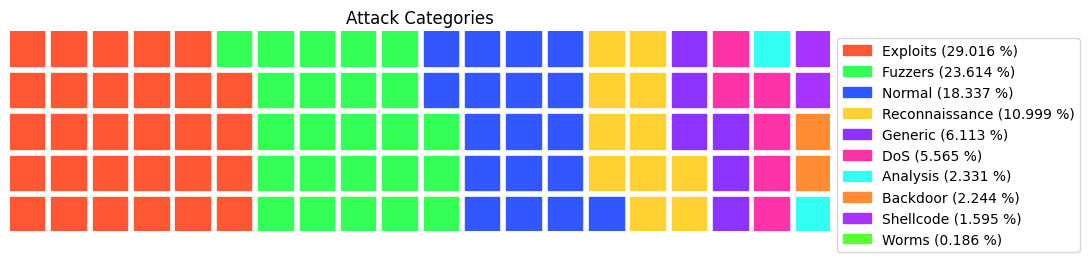

In [35]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,  
    columns = 20,
    values=data['count'],  
    figsize=(11, 5),  
    colors = colors,
    labels=plot_lable,  
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},  
    title={'label': "Attack Categories", 'loc': 'center'}  
)

## Ordinal encodeing

assigns unique value to each category

In [36]:
from sklearn.preprocessing import OrdinalEncoder


cat_col = df.select_dtypes(exclude=['number']).columns
cat_col = ['proto', 'service', 'state']
encoder = OrdinalEncoder()
df[cat_col] = encoder.fit_transform(df[cat_col])
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,attack_cat
0,0.012996,111.0,0.0,1.0,16,18,1540,1644,2539.242797,31,...,1,6,0,0,0,5,7,0,0,Normal
1,0.004119,111.0,0.0,1.0,12,12,1064,2260,5583.879675,31,...,1,1,0,0,0,3,8,0,0,Normal
2,0.000988,117.0,2.0,0.0,2,2,146,178,3036.437382,31,...,1,2,0,0,0,7,2,0,0,Normal
3,3.415787,111.0,11.0,1.0,230,238,24344,29556,136.718127,31,...,1,1,0,0,0,4,1,0,0,Normal
4,0.193943,111.0,0.0,1.0,72,74,4238,63618,747.642372,31,...,1,5,0,0,0,6,12,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135267,1.914309,111.0,9.0,1.0,74,30,69997,2132,53.805315,62,...,1,1,0,0,0,18,1,0,1,Exploits
135277,3.719110,111.0,0.0,1.0,66,340,3086,426483,108.897021,62,...,1,1,0,0,0,2,1,0,1,Exploits
135299,0.996503,111.0,7.0,1.0,20,30,942,16684,49.171955,62,...,1,1,0,0,0,7,1,0,1,Exploits
135305,1.557125,111.0,9.0,1.0,28,22,12601,1954,31.468251,62,...,1,2,0,0,0,2,1,0,1,Exploits


## ADASYN (Adaptive Synthetic Sampling)

Generates synthetic samples based on the density distribution of minority class samples. ADASYN generates more synthetic samples in areas where the classification is difficult.

ADASYN's adaptive approach focuses more on samples that are difficult to learn, which can lead to better classification performance.

SMOTE
Generates synthetic samples by interpolating between minority class samples. SMOTE generates samples uniformly across the feature space.

In [37]:
from imblearn.over_sampling import ADASYN
from collections import Counter

class_counts = Counter(df['attack_cat'])
target_samples = {class_name: count * 10 if count < 5000 else count for class_name, count in class_counts.items()}

adasyn = ADASYN(sampling_strategy=target_samples, random_state=40)
feature = [col for col in df.columns if col != 'attack_cat']

x = df[feature]
y = df['attack_cat']
x_resampled,y_resampled = adasyn.fit_resample(x,y)


In [38]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_smote,y_smote = smote.fit_resample(x,y)

## Tabulating difference

In [39]:
category_counts = df['attack_cat'].value_counts().sort_index()
category_counts_syntheic = pd.Series(y_resampled).value_counts().sort_index()
category_counts_syntheic_smote = pd.Series(y_smote).value_counts().sort_index()
print(category_counts)
print("\nPost syntheic data addition by ADAYSN\n")
print(category_counts_syntheic)
print("\nPost syntheic data addition by smote\n")
print(category_counts_syntheic_smote)

attack_cat
Analysis           1594
Backdoor           1535
DoS                3806
Exploits          19844
Fuzzers           16150
Generic            4181
Normal            12541
Reconnaissance     7522
Shellcode          1091
Worms               127
Name: count, dtype: int64

Post syntheic data addition by ADAYSN

attack_cat
Analysis          15725
Backdoor          15803
DoS               37482
Exploits          19844
Fuzzers           16150
Generic           41738
Normal            12541
Reconnaissance     7522
Shellcode         10453
Worms              1235
Name: count, dtype: int64

Post syntheic data addition by smote

attack_cat
Analysis           1594
Backdoor           1535
DoS                3806
Exploits          19844
Fuzzers           16150
Generic            4181
Normal            12541
Reconnaissance     7522
Shellcode          1091
Worms             19844
Name: count, dtype: int64


# PCA to reduce to lower number of features

In [40]:
from sklearn.decomposition import PCA
data_array = x_resampled
data_pca_input = pd.DataFrame(data_array)
pca = PCA(n_components=20)
pca = pca.fit_transform(data_pca_input)
print(f"NO of features readuced to  :{pca.shape[1]}")


NO of features readuced to  :20


# Split

both with and without pca seperately

In [41]:
from sklearn.model_selection import train_test_split
x_resampled_pca = pca
x_train_pca,x_test_pca,y_train_pca,y_test_pca = train_test_split(x_resampled_pca,y_resampled,train_size=0.7, shuffle= True)
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,train_size=0.7, shuffle= True)
x_train_smote,x_test_smote,y_train_smote,y_test_smote = train_test_split(x_smote,y_smote,train_size=0.7, shuffle= True)


In [42]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(x_train,y_train)
classifier_pca = tree.DecisionTreeClassifier()
classifier_pca = classifier_pca.fit(x_train_pca,y_train_pca)
classifier_smote = tree.DecisionTreeClassifier()
classifier_smote = classifier_smote.fit(x_train_smote,y_train_smote)

In [43]:
y_test_predict = classifier.predict(x_test)
y_test_predict_pca = classifier_pca.predict(x_test_pca)
y_test_predict_smote = classifier_smote.predict(x_test_smote)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
print('For overall data')

accuracy = accuracy_score(y_test, y_test_predict)
print(f"Accuracy with ADAYSN: {accuracy}")
accuracy_pca = accuracy_score(y_test_pca, y_test_predict_pca)
print(f"Accuracy with pca and ADAYSN: {accuracy_pca}")
accuracy_smote = accuracy_score(y_test_smote, y_test_predict_smote)
print(f"Accuracy with smote: {accuracy_smote}\n")

precision = precision_score(y_test, y_test_predict,average='macro')
print(f"Precision with ADAYSN: {precision}")
precision_pca = precision_score(y_test_pca, y_test_predict_pca,average='macro')
print(f"Precision with pca and ADAYSN: {precision_pca}")
precision_smote = precision_score(y_test_smote, y_test_predict_smote,average='macro')
print(f"Precision with smote: {precision_smote}\n")



recall = recall_score(y_test, y_test_predict,average='macro')
print(f"Recall with ADAYSN: {recall}")
recall_pca = recall_score(y_test_pca, y_test_predict_pca,average='macro')
print(f"Recall with pca and ADAYSN: {recall_pca}")
recall_smote = recall_score(y_test_smote, y_test_predict_smote,average='macro')
print(f"Recall with smote: {recall_smote}\n")

f1 = f1_score(y_test, y_test_predict,average='macro')
print(f"F1 Score with ADAYSN: {f1}")
f1_pca = f1_score(y_test_pca, y_test_predict_pca,average='macro')
print(f"F1 Score with pca and ADAYSN: {f1_pca}")
f1_smote = f1_score(y_test_smote, y_test_predict_smote,average='macro')
print(f"F1 Score with smote: {f1_smote}")

For overall data
Accuracy with ADAYSN: 0.7594121162321655
Accuracy with pca and ADAYSN: 0.6490998730111301
Accuracy with smote: 0.8258237808799607

Precision with ADAYSN: 0.7769715014429434
Precision with pca and ADAYSN: 0.6343551681211931
Precision with smote: 0.6535898133068868

Recall with ADAYSN: 0.7654446494551177
Recall with pca and ADAYSN: 0.6200490681825055
Recall with smote: 0.6357237943505709

F1 Score with ADAYSN: 0.7700127210955996
F1 Score with pca and ADAYSN: 0.6255747024576788
F1 Score with smote: 0.640889828464105


## Analysis
For the given data, redusing the number of features using principle componants is affecting the performance as some features are underweighed in the principle componants.

SMOTE may lead to oversampling in dense regions, increasing the chance of introducing redundant information or even overlapping synthetic samples with the majority class.

ADASYN focuses more on creating synthetic samples in regions where the minority class is sparsely distributed or where class overlap exists.
However with generation of synthetic data points using ADASYN gives a good f1 score making the model more generalised.
